컴퓨터 비전 1차 과제
- 과제 기한: 10월 18일 자정

- 과제명: 주어진 영상을 일고 4연결성/8연결성을 이용하여 영상을 라벨링하여 색칠하기

- 제출방법: colab에서 프로그램을 작성한 후 " .py" 확장자로 다운로드하여 가상대학에 제출하시기 바람

- 파일명: 학번.py

- 과제 제출 기한을 반드시 지키고, 이후에 제출시 감정



Python 버전 확인

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize,linewidth=sys.maxsize)
cv2.__version__

'4.1.2'

이미지 다운로드

In [ ]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2021-10-18 04:40:27--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 199.232.76.193
Connecting to i.imgur.com (i.imgur.com)|199.232.76.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2021-10-18 04:40:28 (23.9 MB/s) - ‘iWGMlJR.png’ saved [491/491]



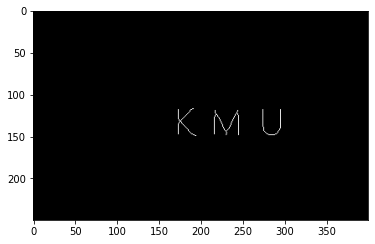

In [ ]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)
plt.show()

# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [ ]:
def flood_fill4(labeled_img,i,j,label):
  if(labeled_img[i][j]==-1):
    labeled_img[i][j]=label
    flood_fill4(labeled_img,i,j-1,label) 
    flood_fill4(labeled_img,i,j+1,label) 
    flood_fill4(labeled_img,i+1,j,label)
    flood_fill4(labeled_img,i-1,j,label) 

def four_connect(img):
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  labeled_img = [[0 for _ in range(gray_img.shape[1]) ]for __ in range(gray_img.shape[0])]
  for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
      if gray_img[i,j]==0 : 
        labeled_img[i][j]=0
      else:
        labeled_img[i][j]= -1
  label=0
  for i in range(0,len(labeled_img)):
    for j in range(0,len(labeled_img[0])):
      if labeled_img[i][j]==-1:
        label+=1
        flood_fill4(labeled_img,i,j,label)

  h = gray_img.shape[0]
  w = gray_img.shape[1]


  print("label number: ", label)
  print("labeling된 행렬 : ")
  for i in range(len(labeled_img)):
      print(labeled_img[i])
 

  mat = np.zeros((h, w, 3), np.uint8)

  r,g,b = cv2.split(mat)

  for i in range(h):
      for j in range(w):
          r[i][j] = labeled_img[i][j]*100
          g[i][j] = labeled_img[i][j]*50
          b[i][j] = labeled_img[i][j]*3

  img = cv2.merge((r,g,b))
  
  return img
    


labeling된 행렬 : 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

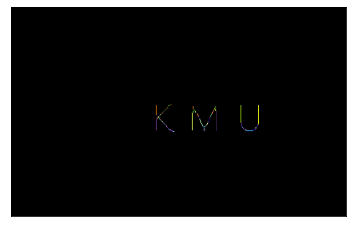

In [ ]:
img = cv2.imread('sample.png')

labeled_img = four_connect(img)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

과제2: 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.-

In [ ]:
def check8_label(labeled_img,i,j,label):
  if (labeled_img[i][j]==-1):
    labeled_img[i][j]=label
    check8_label(labeled_img,i,j-1,label) 
    check8_label(labeled_img,i,j+1,label)
    check8_label(labeled_img,i+1,j,label) 
    check8_label(labeled_img,i-1,j,label)
    check8_label(labeled_img,i+1,j+1,label) 
    check8_label(labeled_img,i-1,j+1,label)
    check8_label(labeled_img,i+1,j-1,label)
    check8_label(labeled_img,i-1,j-1,label)


def eight_connect(img):
    # 함수 작성
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    labeled_img = [[0 for _ in range(gray_img.shape[1]) ]for __ in range(gray_img.shape[0])]
    for i in range(0,gray_img.shape[0]):
        for j in range(0,gray_img.shape[1]):
            if gray_img[i,j]==0 : 
                labeled_img[i][j]=0
            else:
                labeled_img[i][j]= -1
    label=0
    for i in range(0,len(labeled_img)):
        for j in range(0,len(labeled_img[0])):
            if labeled_img[i][j]==-1:
                label+=1
                check8_label(labeled_img,i,j,label)
    h = gray_img.shape[0]
    w = gray_img.shape[1]


    print("label number: ", label)
    print("labeling된 행렬 : ")
    for i in range(len(labeled_img)):
        print(labeled_img[i])
  

    mat = np.zeros((h, w, 3), np.uint8)

    r,g,b = cv2.split(mat)

    for i in range(h):
        for j in range(w):
            r[i][j] = labeled_img[i][j]*100
            g[i][j] = labeled_img[i][j]*50
            b[i][j] = labeled_img[i][j]*3

    img = cv2.merge((r,g,b))
    
    return img


label number:  3
labeling된 행렬 : 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

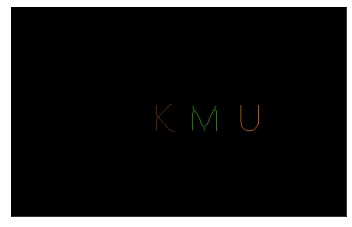

In [ ]:
img = cv2.imread('sample.png')

labeled_img = eight_connect(img)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()